In [1]:
from keras.datasets import imdb
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
import tensorflow

from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Get Data

The data of imdb reviews are prepared for us to use, means that it converted from text to numbers that we can path to the model dierctly.

**But lets dicover more about.**

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data.shape)
print("=" *50)

print(test_data.shape)
print("=" *50)

print(train_labels.shape)
print("=" *50)

print(test_labels.shape)
print("=" *50)

print(train_data[0])
print("=" *50)

print(train_labels[0])
print("=" *50)


(25000,)
(25000,)
(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


## Notes !!

- 25,000 for training 
- 25,000 for testing

Here is the data is splitted for us and handle for shuffling so we can use directly but if not !

## Two ways of splitting data
- Train and Test split
- Train, Dev, Test split

## Train and Test split

We use the test data to estimate the generalization error the model made on unseen data (new instance that have not seen before), this because the model training on data well perform well on it if you evaluate, but this not means as with the new instance once you decide to launch your model.

**We should keep the test data away until we decide to launch a model.**

## Train, Dev, Test split

Another way is to split the training data itself into training and validation, which help us to select between different models as well as tuning the hyperparameters from different model and choose the best one.

## num_words parameters

The data we dealing with from any language have at the end number of unique words (Vocabulary), and we should use specfic number of words as features, because the model should have a specific number of features across all instances and for this we use here the most common 50000 words, means that words that appear low times will be ignored.

Each word at the end has an index which we can see [1, 14, 22, 16, 43, 530, 973, 1622, 1385 ...] from print function. And this list represent a movie text review in numbers which we need and the label for this review is 1 as we see in printing.



In [4]:
# Because we have 50000 most common word means that no index will exceed 49999
max([max(sequence) for sequence in train_data])

9999

## Back to review text

In [5]:
word_index = imdb.get_word_index()
print(list(word_index.keys())[:10],"\n", list(word_index.values())[:10])
print('='*50)
# To handle this replace the key and val
reversed_value_index = dict([(val, key) for (key, val) in word_index.items()])
print(list(reversed_value_index.keys())[:10],"\n", list(reversed_value_index.values())[:10])

# Now retrive the review text, but handle offset used for reserved word as 0, 1, 2 for "padding", "start of sequence", and "unknown"
print('='*50)
review_text_list = [reversed_value_index.get(indx - 3, '?') for indx in train_data[0]]
review_text_string = ' '.join(review_text_list) # to string
print(review_text_list)
print('='*50)
print(review_text_string)

['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods', 'spiders', 'hanging', 'woody', 'trawling'] 
 [34701, 52006, 52007, 16816, 63951, 1408, 16115, 2345, 2289, 52008]
[34701, 52006, 52007, 16816, 63951, 1408, 16115, 2345, 2289, 52008] 
 ['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods', 'spiders', 'hanging', 'woody', 'trawling']
['?', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '?', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '?', 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 

# Bag of Words

Any machine learning model or the deep model require to have specific number of features, and because we are in nlp problems and documents or text are of different length, we use the idea of Bag of words, which help us to have a one length for any document based on the number of Vocabulary (unique words) in the data, and this have a lot of problem, it just handle that we have fixed length to the model, but what about the order of the words comes in each document, the context of grammer and it not effeient as we will have sparce zero vector for each document just some numbers represent words comes in this document.



In [6]:
# dimension=10000 as number of words we used when load the data
# sequences the data we have as list of lists to convert to tensor because of using tensorflow

def vectorize_sequences(sequences, dimension=10000):
  '''
  The function used to convert from list to numby array for the neural netwrok,
  as well as instead of intger numbers convert to 0 and 1 binary vectors.
  sequences: the data we have as list of lists to convert to tensor because of using tensorflow
  dimension=10000: as number of words we used when load the data
  '''
  # Create an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.  # set specific indices of results[i] to 1s
  return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(x_train.shape)
print("="*50)
print(x_test.shape)

print(y_train.shape)
print("="*50)
print(y_test.shape)

# Look at the difference between integers to binary vector
print("="*50)
print(x_train[0])
print("="*50)
print(train_data[0])

(25000, 10000)
(25000, 10000)
(25000,)
(25000,)
[0. 1. 1. ... 0. 0. 0.]
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 1

# Neural Network

Keras has different APIs, sequential apis, which will be used during this session and other one functional apis.

sequential is stack of layers each of these layer with number of units(nurons) here is (16) and the model work from first layer to last layer in a sequence while in functional apis you can move from layer to another one or having multiple inputs or outputs and other functionality.

each layer associated with activation function to use here is (relu) and for last layer it sigmoid because we need to map our y to just 0 or 1 and the sigmoid function help to have result of range 0-1, and it work with the binary problems.


## Model information

- keras.models.Sequential()
    - Create a sequential model (It stack layer by layers as sequence)
    


- layers.Dense(16, activation='relu')

Create first hidden layer with 16 neurons and set the activation function with **Relu** function (linear function), **Dense** means that fully connected layer, and this hidden layer manage the matrix weights and the bias vectors.

- layers.Dense(16, activation='relu') same but with 16 neurons

- layers.Dense(1, activation='sigmoid')

As we dealing with 2-classes (binary classification task) do for the output layer we set the activation function to sigmoid which handle this by probability distribution for 2-class up to 1.


In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Another Way to build the model

# model = keras.models.Sequential([
#     layers.Dense(16, activation='relu', input_shape=(10000,),
#    layers.Dense(16, activation='relu'),
#     layers.Dense(1, activation='sigmoid'),
# ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Model summary

Its layer has its own name as you can see Flatten, dense_1 and so on.

The output shape of each layer is:

- Input layer (None, 10000) None means you can feed any number of instance(batch-size)
- (None, 16), None will be the batch-size when you specify, 16 nurons

The Param:

**Input layer has no params associated with it, it just represent the features we have**

We have just the weights and bais as our paramters so, the weighted matrix of first hidden layer and the bais vector is equal to:

- Number of nuorns in its layer (16) * number of neurons in previous layer and this means 10000 as input shape + bias vector

- Number of nuorns in its layer for bais vector, so 16 * 1
- summ (16 * 10000 + 16) = 160016 as you can see in summary of first hidden layer

Just as above the next layer will be
- (16 * 16 + 16)  = 272
- (1 * 16 + 1) = 17
- Total of params along the network is 160016 + 272 + 17 = 160305




# Lets see the graph of the model



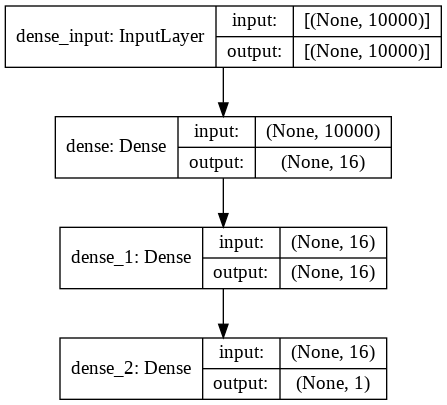

In [9]:
keras.utils.vis_utils.plot_model(model, "model_graph1.png", show_shapes=True)

In [10]:
# get model list of layers
print(model.layers)
hidden1 = model.layers[0] # 1 as first hidden layers 
print("="*50)
print(hidden1.name)
# get the weights and the bias for this hidden layer and all are still random no training happend so bias intilized to 0
weights1, bais1 = hidden1.get_weights()
print(weights1.shape)
print(bais1.shape)
print(bais1)
weights1[:3]

[<keras.layers.core.Dense object at 0x7f09f2d0c8d0>, <keras.layers.core.Dense object at 0x7f09f2d0c850>, <keras.layers.core.Dense object at 0x7f09f0a6c7d0>]
dense
(10000, 16)
(16,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([[-1.16965249e-02, -1.32394265e-02, -1.63051095e-02,
        -1.58542953e-03, -3.41941230e-03,  1.14692301e-02,
         2.03732625e-02,  1.66053735e-02, -8.59874859e-03,
         2.39172541e-02,  1.97264068e-02,  1.10738687e-02,
         1.72790401e-02, -1.65665001e-02, -1.50874257e-07,
        -1.25001958e-02],
       [-1.60161648e-02, -2.08197739e-02, -1.57346912e-02,
        -6.34497032e-03,  9.61683691e-06, -1.59584358e-02,
        -1.60255954e-02,  1.59096159e-03,  2.74079293e-03,
         1.19074024e-02,  1.20695643e-02,  2.23792121e-02,
        -1.92351434e-02,  6.90539926e-03, -6.77590631e-03,
        -5.67890331e-03],
       [-1.29936235e-02, -1.34295253e-02,  3.40669043e-03,
         1.68659426e-02, -2.29663681e-02,  1.23746581e-02,
        -2.25037746e-02,  1.40439719e-02,  9.26930457e-04,
        -9.89691354e-03,  8.98083672e-03, -9.93738789e-03,
         1.46020986e-02,  9.10182670e-03,  1.23949945e-02,
         7.04849511e-03]], dtype=float32)

# Weights initialization


As we can see bias initialized as vector of zeros while weights with random values to break the symmetry in learning.

In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Complile & Fit the model

- loss

**binary_crossentropy** as we deal with binary problem

- rmsprop

all of these paramters use the default values associated with it, but we can use the values we need from keras optimizer or losses or other as we can see below.

- metrics
Is an optional parameters as others except the loss and the optimizer, and it give you the accuracy during each epoch as in the **Bar** and if you apply a validation set, at the end of each epoch it will give you the accuracy as well as the loss on this dev set.

Once we fit the model it give us the history during the journy of the model for each epochs from loss to accuracy as you apply other optional parameters in the compile it will give you history of these parameters.


## Validating our approach

In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by 
setting apart 10,000 samples from the original training data:

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
model.compile(optimizer=tensorflow.optimizers.RMSprop(lr=0.001), # as we mentioned above about change default values of hyperparams
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5251 - binary_accuracy: 0.7862 - val_loss: 0.4001 - val_binary_accuracy: 0.8654
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3228 - binary_accuracy: 0.8986 - val_loss: 0.3195 - val_binary_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2315 - binary_accuracy: 0.9286 - val_loss: 0.2930 - val_binary_accuracy: 0.8847
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1832 - binary_accuracy: 0.9425 - val_loss: 0.2735 - val_binary_accuracy: 0.8922
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1492 - binary_accuracy: 0.9530 - val_loss: 0.2801 - val_binary_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1236 - binary_accuracy: 0.9628 - val_loss: 0.2913 - val_binary_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - los

Note that the call to `model.fit()` returns a `History` object. This object has a member `history`, which is a dictionary containing data 
about everything that happened during training. Let's take a look at it:

In [14]:
print(history.params)
print(history.epoch)

{'verbose': 1, 'epochs': 20, 'steps': 30}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


(0.0, 1.0)

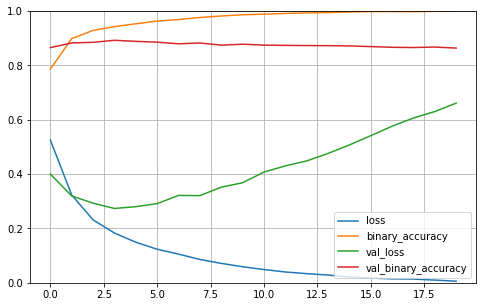

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

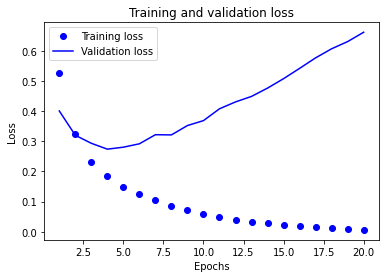

In [16]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Overfitting !

The model work well on training but can we see how it perform on validation set !

Can we solve this by work with the text data it self to handle the preprocess pipeline our self to the the result

# Classifying movie reviews from scratch

So far, we have used the processed IMDB dataset in `keras`. As you have seen, for text to be "usable" in a DNN, we need to transform it into digital form, i.e. integers not strings.

In the basic BoW Dense model, we treat every word as a _feature_

Moreover, for neurons (or ML features in general), we need normalized values [0,1]. Otherwise, words with higher index will be interpretted as higher features importance.

In [4]:
from pathlib import Path
import os
DATA_PATH=Path('./dat/')
DATA_PATH.mkdir(exist_ok=True)
#if not os.path.exists('./dat/aclImdb_v1.tar.gz'):
if not os.path.exists('./dat/aclImdb'):
    !curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz 
    !tar -xf aclImdb_v1.tar.gz -C {DATA_PATH}

The data is already split into train/test. Moreover, we have 3 class folders:

- pos

- neg

- unsup (no specific label)

In [5]:
CLASSES = ['neg', 'pos']#, 'unsup']
PATH=Path('./dat/aclImdb/')

def get_texts(path):
    texts,labels = [],[]
    for idx,label in enumerate(CLASSES):
        for fname in (path/label).glob('*.*'):
            #texts.append(fixup(fname.open('r', encoding='utf-8').read()))
            texts.append(fname.open('r', encoding='utf-8').read())
            labels.append(idx)
    #return np.array(texts),np.array(labels)
    return texts, labels


In [19]:

trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

In [20]:
trn_texts[:5]

['This self proclaimed "very talented artist" have directed easily the worst Spanish film of the 21st century. Lack of emotion, coherence, rhythm, skills, humor... it repeats the same situation over and over again. It shows no character development. It does not even show any violent and/or sexual content, and it does not add anything new to the psycho-killer sub genre. So lame it should be shown at film schools as an example of "what not to do" in a first movie.<br /><br />BTW where the hell is the "talent"? there are scenes which have been shot almost identically; there are scenes which have two or more master shots and it is quite awful to see the action jumping from one master shot to another without a reason. The camera almost never moves, as if the "very talented artist" was afraid of showing his lack of visual skills. The actors playing the main roles act like amateurs, and the supporting cast is hardly believable. There are more holes than plot in the script (if ever there was o

# Ftom Text to Numbers

NLP pipeline have two different stages:
 
- Text preprocessing, in case we do not have a numbers as most cases not as we seen above.

- Text Preparation, from text to numbers to feed to model

## Text preprocessing

in this stage we have to convert documents or tweets to words or sentence, and clean the text from dirty tokens or unicodes or something we do not need to be in our text as if we scrap data from sites and have html tags, normalize the text in language like english we have to take care of Capital letters, also the stemming and lemmatization and other process we can divide this stage into:


- Tokenization (segmentation of document into sentence or words)
- Cleaning data
- Normalization, text morphology is a big issue in NLP. Upper and lower cases, stemming and lemmatization and others
- padding text to have fixed length for all documents

all of these stages and steps included have its own pros and cons and it depends on application you work with as it depends on the language you use.

## Text preprocessing

Lets do some simple example then go deeper on the whole data

In [21]:
print(trn_texts[0])
print(trn_texts[0].split())

This self proclaimed "very talented artist" have directed easily the worst Spanish film of the 21st century. Lack of emotion, coherence, rhythm, skills, humor... it repeats the same situation over and over again. It shows no character development. It does not even show any violent and/or sexual content, and it does not add anything new to the psycho-killer sub genre. So lame it should be shown at film schools as an example of "what not to do" in a first movie.<br /><br />BTW where the hell is the "talent"? there are scenes which have been shot almost identically; there are scenes which have two or more master shots and it is quite awful to see the action jumping from one master shot to another without a reason. The camera almost never moves, as if the "very talented artist" was afraid of showing his lack of visual skills. The actors playing the main roles act like amateurs, and the supporting cast is hardly believable. There are more holes than plot in the script (if ever there was one

## Tokenization

We can tokenize first then cleaning the text or it can came later after some steps, but for now lets check the example above and see how you need to keep tokens like [a], should you consider as token ! what about Simpson's should we tranform to Simpson and is ! what also about (limited,', 'anemic', 'theatrical', 'run).' as one token ? all of this and other should we care about when tokenize our data.
Simple tokenizer is just to tokenize using space like what we have with built-in string method split, but we can move to using some tokenizer desined for tweets or reviews or any text from [nltk or spacy or others], keras also has its own tokenizer but its not good as others desinged tokenizer on grammers like nltk and spacy.

the words like [a, this, in, to] comes a lot, and if we use simple tokenizer, we can see same words with different symbols like What!, what, what? and other forms from capital to small to puncatation associated with words and this affect:

- Size of the vocabulary
- Computational power and others.


In [22]:
# look how it's so different from simple tokenizer !
# \W split by language words
print(re.split('\W+', trn_texts[0]))

['This', 'self', 'proclaimed', 'very', 'talented', 'artist', 'have', 'directed', 'easily', 'the', 'worst', 'Spanish', 'film', 'of', 'the', '21st', 'century', 'Lack', 'of', 'emotion', 'coherence', 'rhythm', 'skills', 'humor', 'it', 'repeats', 'the', 'same', 'situation', 'over', 'and', 'over', 'again', 'It', 'shows', 'no', 'character', 'development', 'It', 'does', 'not', 'even', 'show', 'any', 'violent', 'and', 'or', 'sexual', 'content', 'and', 'it', 'does', 'not', 'add', 'anything', 'new', 'to', 'the', 'psycho', 'killer', 'sub', 'genre', 'So', 'lame', 'it', 'should', 'be', 'shown', 'at', 'film', 'schools', 'as', 'an', 'example', 'of', 'what', 'not', 'to', 'do', 'in', 'a', 'first', 'movie', 'br', 'br', 'BTW', 'where', 'the', 'hell', 'is', 'the', 'talent', 'there', 'are', 'scenes', 'which', 'have', 'been', 'shot', 'almost', 'identically', 'there', 'are', 'scenes', 'which', 'have', 'two', 'or', 'more', 'master', 'shots', 'and', 'it', 'is', 'quite', 'awful', 'to', 'see', 'the', 'action', 'j

In [23]:
# Check the difference meaning between the two sentence you can see they have different meaning after tokenization
print(re.split('\W+', "human-like robots are dumb"))

['human', 'like', 'robots', 'are', 'dumb']


In [24]:
# maybe its good to split s but we need 's to convert later to is ! and what about ? as its question and its have a meaning to our sentence
re.split(r'\W+', "What's on your mind?")

['What', 's', 'on', 'your', 'mind', '']

## Application Requires
Dealing with text affected by the apps you working on and the language you dealing with, some apps require you to remove the puncatations like [- _ ? .] and others and some apps like sentiment analysis like these symbols have its own expression like ^^ and some of language have differnt symbols like Arabic and dictrizations like [َو ً]

# Let's remove punctuations



In [25]:

string.punctuation

re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
s = "What's on your mind?"
stripped = [re_punc.sub('', w) for w in  "What's on your mind?".split()]
stripped

['Whats', 'on', 'your', 'mind']

## Normalization

Language is natural, and its not limited and we can see different words from classical people to people these days, so its free in grammer in context and you can not limit by a set of rules, and computer and models we dealing with require computation powers, some specific length as features and others, so these steps reduce the power we need, the computations we require and others and one of this is Normalization.

can you imagine the number of people write on social media, what about books, the text in general and the spelling mistakes, all of this and more reason have introduce different forms of same word like [What, what, wHat, WhAt] and others, can you imagine the number of words in language ! what about these words with different morphology, its complicated so we maybe need to convert text to one form like lower case ! 

Even of that we will have unknown words and for that we book one token for your vocab to represent words that we may faced later as "UNK"

Also lower case have its negative effect when you consider the capital letters in first of document as it has some meaning !

# What we should use !

We have handled our tokenizer using simple split or even using regular expression and you can do a lot with this, but all this time consuming to think of different cases which can not be handle, even more some of these handle will conflict with other.

So instead we use different tokenizer from library and cases we care about can be handled later.

NLTK have:
- word_tokenize
- casual_tokenizer
- TreeBankTokenizer and others its with its own defined rules or expressions

In [26]:
# word_tokenize from nltk and other tokenizer like causal_tokenizer or t
word_tokenize('human-like robots are dump, but cute')

['human-like', 'robots', 'are', 'dump', ',', 'but', 'cute']

In [27]:
# can you see 'S and ? are saved for us as tokens and as you need to remove or save its your choise now !
word_tokenize("What's up?")

['What', "'s", 'up', '?']

# StopWords

Like these words printed below comes a lot in all documents, sometimes its not important to our application so we removed but even of that it have small portion if you check the number of vocab in your corpse and also its effect you when you removed because it can change from positive to negative if you remove words like [not] and considered stopwords.

In [28]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
s = 'The cat sat on the mat'
words = [w for w in s.lower().split() if w not in stop_words]
words

['cat', 'sat', 'mat']

# Stemming and Lemmatization

Words not just comes with different symbols like [what? or what!], words has different grammars like [ending, ends, ended] which has a root of end, but if we looks at different word like running its has a suffix of ning while ending has ing, and some words the ing is part of the word like sing, and this is what stemming do is remove prefix and suffix of the word, and some words are lost their meaning or even be out of language word ! but stemming reduce the vocubalry size as well as its fast than Lemmatization which aims to relates all word surface forms to their canonical form called lemma.

Lemmatization take the different meaning of the word and choose the most relevant meaning and for this you need to tell the Lemmatizer which is important to you the verb or noun or other of the word.  Not only the morphology is considered, but also the root. This has more importance in languages like Arabic (requires special lemmatizers and stemmers).


In [30]:
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in 'the cats sat on the mats'.split()]
print(stemmed)

['the', 'cat', 'sat', 'on', 'the', 'mat']


In [31]:
# look at "littl" no english word is like that !
stemmed = [porter.stem(word) for word in 'The little girl'.split()]
stemmed

['the', 'littl', 'girl']

In [32]:
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(word) for word in 'The little girls rided in the cars'.split()]

['The', 'little', 'girl', 'rided', 'in', 'the', 'car']

In [33]:
# Consider which part of speach is important to you so am is are with verb will convert to "be" and actually there are a lot of POS available to use
s = 'He is going on a journey fishing on ships'
print([lemmatizer.lemmatize(word, pos='v') for word in s.split()])
print([lemmatizer.lemmatize(word, pos='n') for word in s.split()])


['He', 'be', 'go', 'on', 'a', 'journey', 'fish', 'on', 'ship']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ship']


## Other cleaning

you can search and apply according to your language and time ^^

Later we will see how deep learning have solved like these stages.

# NOW Put all in one pipeline

pipeline is not a stage to implement is just to collect your work into one method and which you need from these steps to run after the other, but should take care of which output to be input the next method.


In [6]:

def one_string_lower_conversation(sentence):
    '''
    Argument:
        text as string of words
    return:
        lower of this string
    '''
    return sentence.lower()
        
def all_string_lower_conversation(text_list):
    '''
    Argument:
        list of strings and each of these strings does contain some of words
    return:
        lower each string in this list
    '''
    text_list = [one_string_lower_conversation(sentence) for sentence in text_list]
    return text_list

def one_string_remove_punctuation(sentence):
    '''
    Argument:
        string of words
    reutrn:
        string without punctuation like [.!?] and others
    '''
    translator = str.maketrans('', '', string.punctuation)


    return sentence.translate(translator)
def all_strings_remove_punctuation(text_list):
    '''
    Argument:
        list of strings 
    reutrn:
        list of strings without punctuation like [.!?] and others
    '''
    text_list = [one_string_remove_punctuation(sentence) for sentence in text_list]
    return text_list

def one_string_steming(words, stemmer):
    '''
    Argument:
        String of words
    return:
        list of words with steming which the root of the word
    '''
    return [stemmer.stem(word) for word in words]




def all_string_steming(text_list):
    '''
    Argument:
        list of strings
    return:
        list of strings with steming which the root of the word in each string
    '''
    stemmer = PorterStemmer()
    text_list = [one_string_steming(sentence, stemmer) for sentence in text_list]
    return text_list


def one_string_Lemmatizing(words, lemmatizer):
    '''
    Argument:
        String of words
    return:
        list of words with Lemmatizing
    '''
    return [lemmatizer.lemmatize(word) for word in words]

def all_string_Lemmatizing(text_list):
    '''
    Argument:
        list of strings
    return:
        list of strings with steming which the root of the word in each string
    '''
    lemmatizer = WordNetLemmatizer()
    text_list = [one_string_Lemmatizing(sentence, lemmatizer) for sentence in text_list]
    return text_list

def one_string_stop_words(words, stop_words):
    '''
    Argument:
        file with stop words
    return:
        remove stopwords
    '''
    return [word for word in words if word not in stop_words]
    
def all_string_stop_words(text_list):
    '''
    Argument:
        list of string
    return:
        list of string without stop words
    '''
    stop_words = stopwords.words('english')
    text_list = [one_string_stop_words(sentence, stop_words) for sentence in text_list]
    return text_list


def one_string_tokenization(sentence):
    '''
    Argument:
        String of words
    return:
        list of words
    '''
    sentence = word_tokenize(sentence)
    return sentence




def all_string_tokenization(text_list):
    '''
    Argument:
        list of Strings
    return:
        list of strings and every string is list of words
    '''
    text_list = [one_string_tokenization(sentence) for sentence in text_list]
    return text_list


def one_string_un_tokenization(sentence):
    '''
    Argument:
        list of words
    return:
        string of words
    '''
    sentence = " ".join(sentence)
    return sentence
    




def all_string_un_tokenization(text_list):
    '''
    Argument:
        list of words
    return:
        string of words
    '''
    text_list = [one_string_un_tokenization(sentence) for sentence in text_list]
    return text_list
  
def one_string_remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def all_string_remove_special_chars(text_list):
    '''
    Argument:
        list of Strings
    return:
        list of strings and every string is list of words
    '''
    text_list = [one_string_remove_special_chars(sentence) for sentence in text_list]
    return text_list


def one_string_remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def all_string_remove_non_ascii(text_list):
    """Remove non-ASCII characters from list of tokenized words"""
    text_list = [one_string_remove_non_ascii(sentence) for sentence in text_list]
    return text_list



def pip_line(text_list):
    test = all_string_remove_special_chars(text_list)
    test = all_string_remove_non_ascii(test)
    test = all_strings_remove_punctuation(test)
    test = all_string_lower_conversation(test)

    test = all_string_tokenization(test)
    test = all_string_stop_words(test)
    test = all_string_Lemmatizing(test)

    return test


In [22]:
test = trn_texts[:10]
test = pip_line(test)
print(test[0])
print(one_string_un_tokenization(test[0]))

['self', 'proclaimed', 'talented', 'artist', 'directed', 'easily', 'worst', 'spanish', 'film', '21st', 'century', 'lack', 'emotion', 'coherence', 'rhythm', 'skill', 'humor', 'repeat', 'situation', 'show', 'character', 'development', 'even', 'show', 'violent', 'andor', 'sexual', 'content', 'add', 'anything', 'new', 'psychokiller', 'sub', 'genre', 'lame', 'shown', 'film', 'school', 'example', 'first', 'movie', 'btw', 'hell', 'talent', 'scene', 'shot', 'almost', 'identically', 'scene', 'two', 'master', 'shot', 'quite', 'awful', 'see', 'action', 'jumping', 'one', 'master', 'shot', 'another', 'without', 'reason', 'camera', 'almost', 'never', 'move', 'talented', 'artist', 'afraid', 'showing', 'lack', 'visual', 'skill', 'actor', 'playing', 'main', 'role', 'act', 'like', 'amateur', 'supporting', 'cast', 'hardly', 'believable', 'hole', 'plot', 'script', 'ever', 'one', 'really', 'disheartening', 'movie', 'whatsoever', 'talented', 'director']
self proclaimed talented artist directed easily worst 

## Keras 

There are many other NLP tools than NLTK like spacy, but also keras which deep learning frame work have its own simple tokenizer as we see how simple tokenizer is work, but its like that you have all what you need in one place, but also you can work with any other library and use the part you need from keras.

Keras has **text_to_word_sequence** to convert your text to sequence of words(tokenization)

In [36]:
# Lets see the same document before
text = 'human-like robots are dump, but cute' # 'The quick brown fox jumped over the lazy dog.'

# tokenize the document
result = text_to_word_sequence(text)
print(result)


['human', 'like', 'robots', 'are', 'dump', 'but', 'cute']


# Lets move from text to numbers

## Text preparation

from text to numbers should we moved to path these numbers to model and these numbers has to be vectorized in specific length because, model dealing with specific number of features at the end.

To get this specific length, we get all the tokens across all documents (the whole corps), as we did before with **num_words** at beginning of notebook, and this limited of vocabulary at the end will affect to have Unknown tokens and for this we reserve a place of speachial tokens like UNK

There are different method to convert text to numbers ( binary/integer(counts, frequency, tf-idf)/digital format)

In [37]:
texts = trn_texts + tst_texts

# Loop over reviews, then split each reviews, get all tokens in one list
words = [word for text in texts for word in text.split()]
v = sorted(list(set(words)))
print(v[:100])

['\x08\x08\x08\x08A', '\x10own', '!', '!!', '!!!', '!!!!', '!!!!!', '!!!!!!', '!!!!!!!', '!!!!!!!!', '!!!!!!!!!', '!!!!!!!!!!', '!!!!!!!!!!!', '!!!!!!!!!!!!!', '!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!<br', '!!!!!!!!!<br', '!!!!!!!!.', '!!!!!!!<br', '!!!!!(spoilers', '!!!!!<br', '!!!!"', '!!!!)', '!!!!<br', '!!!)', '!!!..', '!!!.<br', '!!!7!!!', '!!!<br', '!!!Scott', '!!!YoU', '!!"', '!!",', '!!)', '!!).', '!!)<br', '!!*<br', '!!,', '!!-', '!!.', '!!....<br', '!!..<br', '!!<br', '!!?', '!!??', '!!??,', '!!This', '!"', '!",', '!".', "!'I've", '!)', '!),', '!).', '!)..', '!)...', '!).<br', '!*$*%', '!**', '!,', '!--)', '!.', '!..', '!....', '!....Both', '!....being', '!....ridiculous.<br', "!..Didn't", '!.<br', '!:45am', '!<br', '!?', '!?!', '!?!!', '!?!?!?!?!?', '!??)..', '!@#$', '!@$%', '!France!.', '!The', '!^@@&*!', '!destroys',

In [38]:
# Lets get 2 dictionary one strings as keys and other reverse
strin_2_index = dict( (val, key) for (key, val) in enumerate(v))
print(list(strin_2_index.keys())[:10],"\n", list(strin_2_index.values())[:10])

index_2_string = dict( (key, val) for (key, val) in enumerate(v))
print(list(index_2_string.keys())[:10],"\n", list(index_2_string.values())[:10])

['\x08\x08\x08\x08A', '\x10own', '!', '!!', '!!!', '!!!!', '!!!!!', '!!!!!!', '!!!!!!!', '!!!!!!!!'] 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
 ['\x08\x08\x08\x08A', '\x10own', '!', '!!', '!!!', '!!!!', '!!!!!', '!!!!!!', '!!!!!!!', '!!!!!!!!']


In [39]:
# Get the frequency of words across documents

word_counts = Counter(words)
print(word_counts.most_common(5))
v_s = sorted(word_counts.items(), key=lambda x: x[1],  reverse=True)

strin_2_index_2 = dict( (val, key) for (key, val) in enumerate(v))
print(list(strin_2_index_2.keys())[:10],"\n", list(strin_2_index_2.values())[:10])

index_2_string_2 = dict( (val, key) for (key, val) in enumerate(v))
print(list(index_2_string_2.keys())[:10],"\n", list(index_2_string_2.values())[:10])



[('the', 568735), ('a', 306960), ('and', 301919), ('of', 283625), ('to', 261850)]
['\x08\x08\x08\x08A', '\x10own', '!', '!!', '!!!', '!!!!', '!!!!!', '!!!!!!', '!!!!!!!', '!!!!!!!!'] 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['\x08\x08\x08\x08A', '\x10own', '!', '!!', '!!!', '!!!!', '!!!!!', '!!!!!!', '!!!!!!!', '!!!!!!!!'] 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Note !

From **Zipf's Law** is saying that if look at frequency of words you will see pattern of that first word approximate appear two times from second word and three times from third word and so on.


# Keras Tokenizer

In [40]:
all_reviews = trn_texts + tst_texts
all_reviews[:5]

['This self proclaimed "very talented artist" have directed easily the worst Spanish film of the 21st century. Lack of emotion, coherence, rhythm, skills, humor... it repeats the same situation over and over again. It shows no character development. It does not even show any violent and/or sexual content, and it does not add anything new to the psycho-killer sub genre. So lame it should be shown at film schools as an example of "what not to do" in a first movie.<br /><br />BTW where the hell is the "talent"? there are scenes which have been shot almost identically; there are scenes which have two or more master shots and it is quite awful to see the action jumping from one master shot to another without a reason. The camera almost never moves, as if the "very talented artist" was afraid of showing his lack of visual skills. The actors playing the main roles act like amateurs, and the supporting cast is hardly believable. There are more holes than plot in the script (if ever there was o

In [41]:
# Keras tokenizer take a list of string and return dictionary of (Vocabulary) indexed

keras_tokenizer = Tokenizer()
keras_tokenizer.fit_on_texts(texts)
keras_tokenizer.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'he': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'so': 34,
 'who': 35,
 'from': 36,
 'like': 37,
 'or': 38,
 'just': 39,
 'her': 40,
 'out': 41,
 'about': 42,
 'if': 43,
 "it's": 44,
 'has': 45,
 'there': 46,
 'some': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'my': 56,
 'even': 57,
 'would': 58,
 'she': 59,
 'which': 60,
 'only': 61,
 'really': 62,
 'see': 63,
 'story': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'me': 68,
 'well': 69,
 'were': 70,
 'than': 71,
 'much': 72,
 'we': 73,
 'bad': 74,
 'been': 75,
 'get': 76,
 'do': 77,
 'great': 78,
 'other': 79,
 'will': 80,
 'also': 81,
 'into': 82,
 'p

In [42]:
# Keras tokenizer also can help you defined special tokens to reserve for you
keras_tokenizer = Tokenizer(oov_token='UNK')
keras_tokenizer.fit_on_texts(texts)
keras_tokenizer.word_index['UNK']

1

# Notes !

UNK take index 1 instead of 0, because index 0 are reserved for padding so the vocabulary size will increased by 1.

https://github.com/keras-team/keras/issues/9637

Also num_words=10000 does not mean ignore the other vocabulary, it means that the length of vocabulary is all your unique words, but when you convert to numbers it will look to first 10000 vocab only.



In [43]:
# Lets limit the vocab for first 100 word
keras_tokenizer = Tokenizer(num_words=100, oov_token='UNK')
keras_tokenizer.fit_on_texts(texts)
len(keras_tokenizer.word_index)

124253

In [44]:
# This is will produce based on chars because you should path a list of strings and all are UNK as we can see
s = 'Hello World'
keras_tokenizer.texts_to_sequences(s)

[[1], [1], [1], [1], [1], [], [1], [1], [1], [1], [1]]

In [45]:
s = ['Hello World']
keras_tokenizer.texts_to_sequences(s)

[[1, 1]]

In [46]:
# Lets we increase size of vocab (num_words return most frequent words)
keras_tokenizer = Tokenizer(num_words=10000, oov_token='UNK')
keras_tokenizer.fit_on_texts(texts)
len(keras_tokenizer.word_index)

124253

In [47]:
s = ['Hello World']
keras_tokenizer.texts_to_sequences(s)

[[5119, 182]]

In [52]:

# Lets we increase size of vocab (num_words return most frequent words)
keras_tokenizer = Tokenizer( oov_token='UNK')
keras_tokenizer.fit_on_texts(texts)
len(keras_tokenizer.word_index)

124253

In [53]:
ls = keras_tokenizer.texts_to_sequences(s)
s = keras_tokenizer.sequences_to_texts(ls)
print(ls)
print(s)

[[5119, 182]]
['hello world']


In [54]:
# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort done',
'nice work work',
'Excellent done done!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)    # number of times word occurs across all documents
print("="*50)
print(t.document_count) # number of documents you have in your dataset
print("="*50) 
print(t.word_index)     # sort words based on thier counts in word_counts (you can see work came first and take index 1)
print("="*50)
print(t.word_docs)     # count each word once for each document it appear (see how done for the three documents even it occured two time in one of them)


OrderedDict([('well', 1), ('done', 4), ('good', 1), ('work', 3), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'done': 1, 'work': 2, 'well': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 3, 'well': 1, 'work': 2, 'good': 1, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})


# Padding

As we mentioned that should all documents have the same length.

We will see first how to handle this using padding instead of based on the vocabulary, and this reduce the dimension very well.

## What is padding !

Because all of documents are of different length and classical ways as we will see is to list all your unique vocabs as length of all documents, but this consume a lot and make a sparse vector of zeros, but if we can get the maxium length of larger document it can help to take as length and for each document will have this length, but it also maybe not effective as to consider the median of length from all documents to take as your length.

Instead of sparse vector of zeros we have another vector also maybe contain zeros if its length is less the max_length we specify, but these zeros you can choose which in which place you need to leave when length of document is less the max_length, and the best of that is at the begining of the vector because words comes in sequence as stat machine.

Keras have different forms of represent your vector the form we dealing to now is the index form, but we can use:

- Binary representation
- Counts representation
- Frequency representation
- TF-IDF.

In [55]:
# We can not path different length to the model
docs = ['cartoon movie show', 'hello world']
docs = [s.split() for s in docs]
l = keras_tokenizer.texts_to_sequences(docs)
l

[[1062, 18, 120], [5119, 182]]

In [56]:

keras_tokenizer = Tokenizer(num_words=10000, oov_token='UNK')
keras_tokenizer.fit_on_texts(texts)
bow = keras_tokenizer.texts_to_matrix(texts[:10], mode='count') 
bow.shape # can you see second dimension based on the num_words

(10, 10000)

In [57]:
print(bow[0][:100]) # see how its look without padding 

[ 0.  4. 13.  6.  4.  5.  4.  3.  4.  2.  6.  0.  1.  0.  2.  2.  0.  0.
  2.  0.  2.  0.  3.  0.  3.  1.  3.  1.  2.  0.  0.  1.  0.  1.  0.  1.
  0.  1.  1.  2.  0.  0.  0.  0.  2.  0.  0.  4.  0.  1.  0.  0.  2.  2.
  0.  1.  0.  0.  1.  0.  0.  2.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [58]:
keras_tokenizer = Tokenizer(num_words=10000, oov_token='UNK')
keras_tokenizer.fit_on_texts(texts)
bow = keras_tokenizer.texts_to_matrix(texts[:10], mode='freq')  # best because of different ranges with counts
bow.shape # can you see second dimension based on the num_words

(10, 10000)

In [59]:
print(bow[0][:100]) # see how its look without padding 

[0.         0.02094241 0.06806283 0.03141361 0.02094241 0.02617801
 0.02094241 0.01570681 0.02094241 0.0104712  0.03141361 0.
 0.0052356  0.         0.0104712  0.0104712  0.         0.
 0.0104712  0.         0.0104712  0.         0.01570681 0.
 0.01570681 0.0052356  0.01570681 0.0052356  0.0104712  0.
 0.         0.0052356  0.         0.0052356  0.         0.0052356
 0.         0.0052356  0.0052356  0.0104712  0.         0.
 0.         0.         0.0104712  0.         0.         0.02094241
 0.         0.0052356  0.         0.         0.0104712  0.0104712
 0.         0.0052356  0.         0.         0.0052356  0.
 0.         0.0104712  0.         0.0052356  0.0052356  0.
 0.         0.         0.         0.         0.         0.
 0.0052356  0.         0.         0.         0.0052356  0.
 0.0052356  0.         0.         0.         0.         0.
 0.         0.         0.         0.0052356  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0. 

# Sklearn

## CountVectorizer

Another way of vectorization using sklearn instead of keras, but you can not limit the vocab as in keras.

sklearn method doing some of preprocessing

## TfidfVectorizer

The first part is TF that the term frequency is the number of times a word appears in a document divided by the total number of words in the document. 
Every document has its own term frequency. The second part is IDF inverse document frequency is the log of the number of documents divided by the number of documents that contain the word w.

 Inverse data frequency determines the weight of rare words across all documents in the corpus. Also, the TF-IDF makes these rare words have more weights because its repeat is not a big as other words like [they are and others] that may have a lot of time in our text so it takes the inverse after counting the number of each term over its document and overall corpus.


In [60]:

vectorizer = CountVectorizer()
vectorizer.fit(texts)
bow = vectorizer.transform(texts[:10])
bow.shape

(10, 101895)

In [61]:
print(vectorizer.vocabulary_)

{'this': 90455, 'self': 79879, 'proclaimed': 70726, 'very': 96714, 'talented': 88820, 'artist': 6118, 'have': 40913, 'directed': 25334, 'easily': 28205, 'the': 90160, 'worst': 100223, 'spanish': 84301, 'film': 33226, 'of': 63757, '21st': 712, 'century': 15673, 'lack': 50948, 'emotion': 29353, 'coherence': 18266, 'rhythm': 75709, 'skills': 82445, 'humor': 43546, 'it': 46902, 'repeats': 74783, 'same': 77913, 'situation': 82281, 'over': 65066, 'and': 4541, 'again': 3004, 'shows': 81472, 'no': 62551, 'character': 16022, 'development': 24627, 'does': 26394, 'not': 62917, 'even': 30792, 'show': 81437, 'any': 5151, 'violent': 97143, 'or': 64417, 'sexual': 80441, 'content': 19830, 'add': 2445, 'anything': 5169, 'new': 62038, 'to': 91217, 'psycho': 71389, 'killer': 49640, 'sub': 86832, 'genre': 36815, 'so': 83481, 'lame': 51161, 'should': 81407, 'be': 8758, 'shown': 81466, 'at': 6553, 'schools': 78994, 'as': 6166, 'an': 4414, 'example': 31005, 'what': 98847, 'do': 26273, 'in': 44763, 'first': 3

In [62]:
bow # it compress into spacy  

<10x101895 sparse matrix of type '<class 'numpy.int64'>'
	with 1004 stored elements in Compressed Sparse Row format>

In [63]:
# convert to array
bow = bow.toarray()
print(bow.shape)
print(bow)

(10, 101895)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]

vectorizer = TfidfVectorizer()
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())



{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


# Notes !

How its sort based in the terms frequency, 8 words are your second dimention as it the unique words in your data, also see differnt weight for rare words like jumbed at index 3 which fox at index 2

# Lets Take a Big step

## Prepared plots as functions


In [19]:
def graph_1(history, title_):
  acc = history.history['binary_accuracy']
  val_acc = history.history['val_binary_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title(title_)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()
  return history_dict

def graph_2(history, history_dict, title_):
  acc = history.history['binary_accuracy']
  val_acc = history.history['val_binary_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.clf()   # clear figure
  acc_values = history_dict['binary_accuracy']
  val_acc_values = history_dict['val_binary_accuracy']

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title(title_)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

# Keras Model as function

In [14]:

def keras_model(x_train, y_train, x_val, y_val, epochs, batch_size, lr):

    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=tensorflow.optimizers.RMSprop(lr=lr),
                  loss=losses.binary_crossentropy,
                  metrics=[metrics.binary_accuracy])
            
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))
    return history

In [15]:
def prepare_data(features_mode, vocab_sz):
    trn_texts,trn_labels = get_texts(PATH/'train')
    tst_texts,tst_labels = get_texts(PATH/'test')

    # run our preprocessing pipeline 
    trn_texts = pip_line(trn_texts)
    tst_texts = pip_line(tst_texts)

    # Tokenize with Keras

    # Either pre-define vocab size
    vocab_sz = vocab_sz # take first 10000 vocab and reservie 1 for UNK
    keras_tokenizer = Tokenizer(num_words=vocab_sz, oov_token='UNK')
    #tok = Tokenizer(oov_token='UNK')
    keras_tokenizer.fit_on_texts(trn_texts + tst_texts) # make the vocab from train and test all the data
    #vocab_sz = len(tok.word_index) # If all possible vocab, else, it's the predefine vocab_sz. Remember we cannot always use the len(tok.word_index), since it's always the max.

    # Extract binary BoW features
    x_train = keras_tokenizer.texts_to_matrix(trn_texts, mode=features_mode)
    x_test = keras_tokenizer.texts_to_matrix(tst_texts, mode=features_mode)

    y_train = np.asarray(trn_labels).astype('float32')
    y_test = np.asarray(tst_labels).astype('float32')

    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape)

    return x_train, y_train, x_test, y_test


# Modeling

At the beginning of notebook we use the prepared data for use in form of numbers directly, but here we have implement our preprocessing stage and then use keras tokenizer to see the difference .

**Look at the two model with and without preprocessing**

# Our Tokenizer Vs Prepared Data (Data not shuffled)

Using the keras tokenizer then train the model, and at same time check the result from imdb on the same data but data are prepared for us in numbers

In [72]:
x_train, y_train, x_test, y_test = prepare_data('binary', 10000)

# Split the train to train and validation (Data not shuffled)

x_val = x_train[:10000]
x_train = x_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

history = keras_model(x_train, y_train, x_val, y_val, 20, 512, .001)
history_dict = history.history
history_dict.keys()


(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.4245 - binary_accuracy: 0.8271 - val_loss: 1.1267 - val_binary_accuracy: 0.1902
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2438 - binary_accuracy: 0.9147 - val_loss: 0.8795 - val_binary_accuracy: 0.5648
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1577 - binary_accuracy: 0.9480 - val_loss: 0.6721 - val_binary_accuracy: 0.7044
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1133 - binary_accuracy: 0.9634 - val_loss: 0.9183 - val_binary_accuracy: 0.6405
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0831 - binary_accuracy: 0.9742 - val_loss: 0.9648 - val_binary_accuracy: 0.6618
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0617 - binary_accuracy: 0.9820 - val_loss: 0.7831 - val_binary_accuracy: 0.7358
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

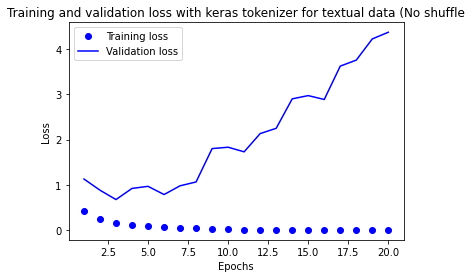

In [73]:
# Data was need to be prepared
_ = graph_1(history, 'Training and validation loss with keras tokenizer for textual data (No shuffle') 

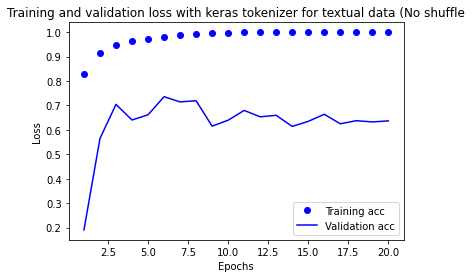

In [74]:
_ = graph_2(history, history_dict, 'Training and validation loss with keras tokenizer for textual data (No shuffle')

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)

# Extract binary BoW features
x_train = tok.sequences_to_matrix(train_data, mode='binary')
x_test = tok.sequences_to_matrix(test_data, mode='binary')
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
x_train = x_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

history = keras_model(x_train, y_train, x_val, y_val, 20, 512, .001)
history_dict = history.history
history_dict.keys()




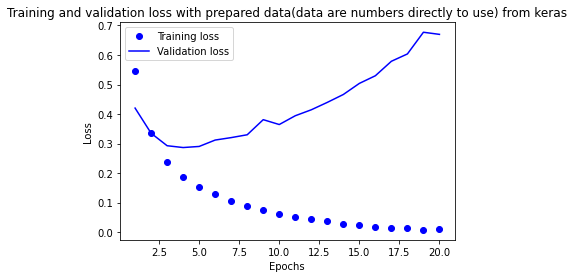

In [ ]:
_ = graph_1(history, 'Training and validation loss with prepared data(data are numbers directly to use) from keras')

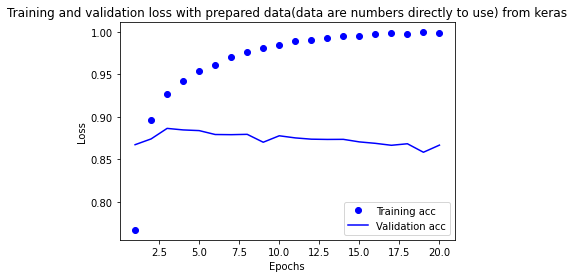

In [ ]:
_ = graph_2(history, history_dict, 'Training and validation loss with prepared data(data are numbers directly to use) from keras')

# Note !

Keras pre-porcess has 86% than what we have is just about 68% accuracy

**Lets check with shuffling data**

In [ ]:
# Again run the model with shuffled data and check the resul

# Binary features with 10000 vocabulary
x_train, y_train, x_test, y_test = prepare_data('binary', 10000)

# Split the train to train and validation (shuffled data)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

history = keras_model(x_train, y_train, x_val, y_val, 20, 512, .001)
history_dict = history.history
history_dict.keys()

(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5217 - binary_accuracy: 0.7997 - val_loss: 0.3966 - val_binary_accuracy: 0.8720
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3092 - binary_accuracy: 0.9086 - val_loss: 0.3371 - val_binary_accuracy: 0.8696
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2208 - binary_accuracy: 0.9351 - val_loss: 0.2873 - val_binary_accuracy: 0.8865
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1695 - binary_accuracy: 0.9479 - val_loss: 0.3090 - val_binary_accuracy: 0.8760
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1335 - binary_accuracy: 0.9599 - val_loss: 0.3022 - val_binary_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1062 - binary_accuracy: 0.9694 - val_loss: 0.3286 - val_binary_accuracy: 0.8789
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

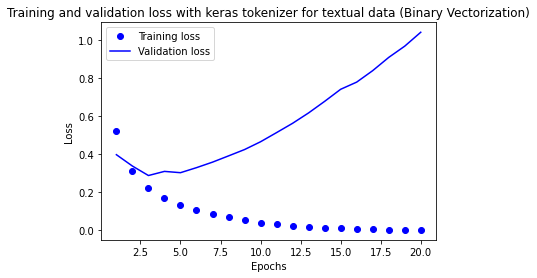

{'binary_accuracy': [0.7997333407402039,
  0.9085999727249146,
  0.9350666403770447,
  0.9479333162307739,
  0.9598666429519653,
  0.9693999886512756,
  0.9760666489601135,
  0.9828000068664551,
  0.9886666536331177,
  0.9918000102043152,
  0.9944666624069214,
  0.9956666827201843,
  0.9968666434288025,
  0.9979333281517029,
  0.9983333349227905,
  0.9990666508674622,
  0.9992666840553284,
  0.9992666840553284,
  0.999666690826416,
  0.9997333288192749],
 'loss': [0.521671712398529,
  0.3091631233692169,
  0.22075888514518738,
  0.1694837212562561,
  0.13346551358699799,
  0.10622227936983109,
  0.08431493490934372,
  0.06766043603420258,
  0.05222304165363312,
  0.040500737726688385,
  0.0315324142575264,
  0.02430379018187523,
  0.01778433658182621,
  0.013357528485357761,
  0.010413101874291897,
  0.0070815845392644405,
  0.00522450590506196,
  0.004035820718854666,
  0.002503366442397237,
  0.0019645262509584427],
 'val_binary_accuracy': [0.871999979019165,
  0.8695999979972839,
  

In [ ]:
_ = graph_1(history, 'Training and validation loss with keras tokenizer for textual data (Binary Vectorization)')

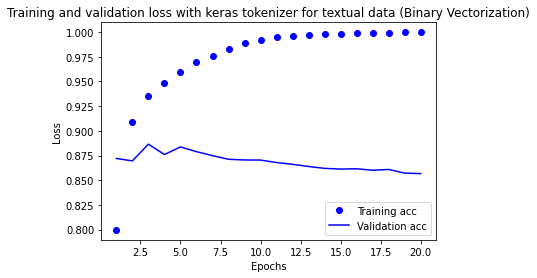

In [ ]:
_ = graph_2(history, history_dict, 'Training and validation loss with keras tokenizer for textual data (Binary Vectorization)')

In [ ]:
# instead of binary (0,1) represent lets move with counts words 


# count features with 10000 vocabulary
x_train, y_train, x_test, y_test = prepare_data('count', 10000)

# Split the train to train and validation (shuffled data)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

history = keras_model(x_train, y_train, x_val, y_val, 20, 512, .001)
history_dict = history.history
history_dict.keys()


(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.4870 - binary_accuracy: 0.8087 - val_loss: 0.3741 - val_binary_accuracy: 0.8707
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2828 - binary_accuracy: 0.9127 - val_loss: 0.3494 - val_binary_accuracy: 0.8642
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2062 - binary_accuracy: 0.9371 - val_loss: 0.2968 - val_binary_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1571 - binary_accuracy: 0.9535 - val_loss: 0.3027 - val_binary_accuracy: 0.8839
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1238 - binary_accuracy: 0.9618 - val_loss: 0.3355 - val_binary_accuracy: 0.8775
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0986 - binary_accuracy: 0.9720 - val_loss: 0.3496 - val_binary_accuracy: 0.8768
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

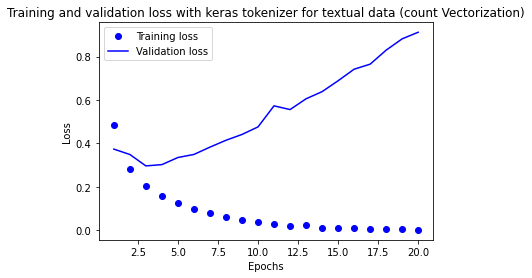

In [ ]:
_ = graph_1(history, 'Training and validation loss with keras tokenizer for textual data (count Vectorization)')

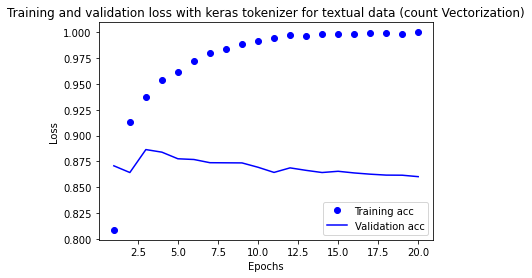

In [ ]:
_ = graph_2(history, history_dict, 'Training and validation loss with keras tokenizer for textual data (count Vectorization)')

# Note !

Even counts here give you approximate result to binary but actually its not good because it have different ranges and Neural network doesn't work well with different ranges.

# Overfitting

Can we see how the behavior between training and validation, so it's not generalize well, and it overfitting the training data very well but poorly on validation.

In [ ]:
# Instead of counts use frequency (normalized counts) 



# freq features with 10000 vocabulary
x_train, y_train, x_test, y_test = prepare_data('freq', 10000)

# Split the train to train and validation (shuffled data)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

history = keras_model(x_train, y_train, x_val, y_val, 20, 512, .001)
history_dict = history.history
history_dict.keys()


(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.6868 - binary_accuracy: 0.6989 - val_loss: 0.6780 - val_binary_accuracy: 0.8258
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.6673 - binary_accuracy: 0.8277 - val_loss: 0.6556 - val_binary_accuracy: 0.8194
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6395 - binary_accuracy: 0.8367 - val_loss: 0.6261 - val_binary_accuracy: 0.8180
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6050 - binary_accuracy: 0.8459 - val_loss: 0.5907 - val_binary_accuracy: 0.8387
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5651 - binary_accuracy: 0.8573 - val_loss: 0.5522 - val_binary_accuracy: 0.8395
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5215 - binary_accuracy: 0.8611 - val_loss: 0.5107 - val_binary_accuracy: 0.8512
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

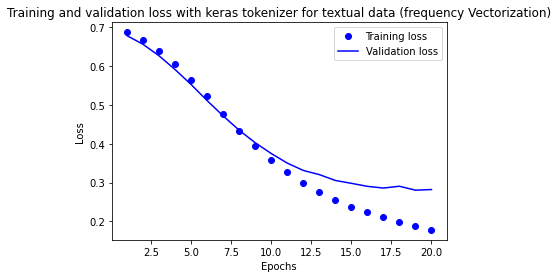

In [ ]:
# As you can see, normalizing the counts correctly has a good effect to delay the overfitting.
_ = graph_1(history, 'Training and validation loss with keras tokenizer for textual data (frequency Vectorization)')

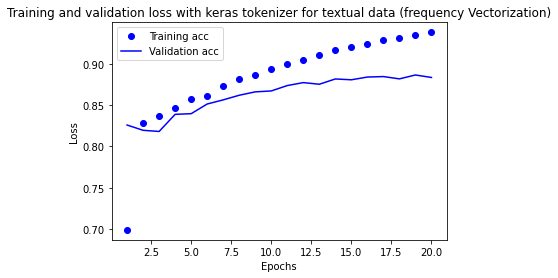

In [ ]:
_ = graph_2(history, history_dict, 'Training and validation loss with keras tokenizer for textual data (frequency Vectorization)')

In [ ]:
# lets see the effect of tf-idf

# tfidf features with 10000 vocabulary
x_train, y_train, x_test, y_test = prepare_data('tfidf', 10000)

# Split the train to train and validation (shuffled data)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

history = keras_model(x_train, y_train, x_val, y_val, 20, 512, .001)
history_dict = history.history
history_dict.keys()


(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.4570 - binary_accuracy: 0.8014 - val_loss: 0.3523 - val_binary_accuracy: 0.8617
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2211 - binary_accuracy: 0.9295 - val_loss: 0.2954 - val_binary_accuracy: 0.8836
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1406 - binary_accuracy: 0.9565 - val_loss: 0.3652 - val_binary_accuracy: 0.8641
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0930 - binary_accuracy: 0.9735 - val_loss: 0.3552 - val_binary_accuracy: 0.8767
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0601 - binary_accuracy: 0.9851 - val_loss: 0.3979 - val_binary_accuracy: 0.8760
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0398 - binary_accuracy: 0.9910 - val_loss: 0.4464 - val_binary_accuracy: 0.8742
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

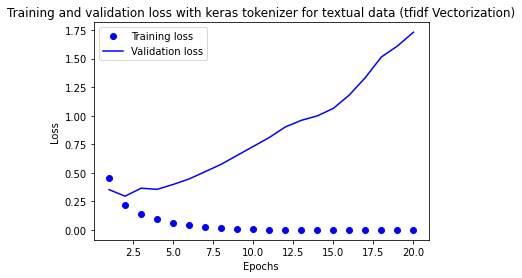

In [ ]:
_ = graph_1(history, 'Training and validation loss with keras tokenizer for textual data (tfidf Vectorization)')

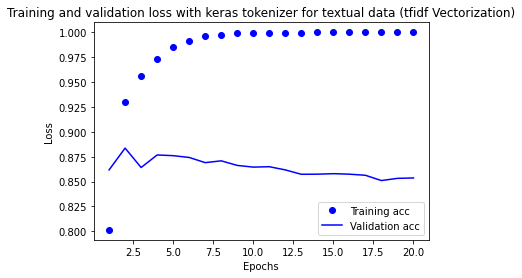

In [ ]:
_ = graph_2(history, history_dict, 'Training and validation loss with keras tokenizer for textual data (tfidf Vectorization)')

# Sklearn & Preprocessing

Lets move to use sklearn with and without our pipeline of preprocessing.




In [7]:

trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')


In [8]:
text = trn_texts + tst_texts
text_preprocessed = pip_line(text)
print(text_preprocessed[:2])
text_preprocessed_untokenized = all_string_un_tokenization(text_preprocessed)
print(text_preprocessed_untokenized[:2])

[['self', 'proclaimed', 'talented', 'artist', 'directed', 'easily', 'worst', 'spanish', 'film', '21st', 'century', 'lack', 'emotion', 'coherence', 'rhythm', 'skill', 'humor', 'repeat', 'situation', 'show', 'character', 'development', 'even', 'show', 'violent', 'andor', 'sexual', 'content', 'add', 'anything', 'new', 'psychokiller', 'sub', 'genre', 'lame', 'shown', 'film', 'school', 'example', 'first', 'movie', 'btw', 'hell', 'talent', 'scene', 'shot', 'almost', 'identically', 'scene', 'two', 'master', 'shot', 'quite', 'awful', 'see', 'action', 'jumping', 'one', 'master', 'shot', 'another', 'without', 'reason', 'camera', 'almost', 'never', 'move', 'talented', 'artist', 'afraid', 'showing', 'lack', 'visual', 'skill', 'actor', 'playing', 'main', 'role', 'act', 'like', 'amateur', 'supporting', 'cast', 'hardly', 'believable', 'hole', 'plot', 'script', 'ever', 'one', 'really', 'disheartening', 'movie', 'whatsoever', 'talented', 'director'], ['movie', 'open', 'meteor', 'crashing', 'lake', 'unb

# TfidfVectorizer

We can feed to TfidfVectorizer your text as list of lists each of them is tokenized string but for this we need to create dummy function to pass to the tokenizer paramter, and also we can pass as list of string and let sklearn TfidfVectorizer do the process of tokenization for us.

## TfidfVectorizer & Keras

Lets check the result between different experiment from tokenize using our pipeline and from applying and not applying the preprocessing

In [42]:
def dummy_fun(docs):
    return docs

# def Tfidf_vectorizer(text, vocab_sz, tokenizer_, trn_texts, tst_texts):
#     vocab_sz = vocab_sz
#     Tfidf_vectorizer = TfidfVectorizer(max_features=vocab_sz, tokenizer=tokenizer_, preprocessor=tokenizer_)
#     print("="*50)

#     Tfidf_vectorizer.fit(text)

#     x_train = Tfidf_vectorizer.transform(trn_texts).toarray()
#     x_test  =  Tfidf_vectorizer.transform(tst_texts).toarray()


#     y_train = np.asarray(trn_labels).astype('float32')
#     y_test  = np.asarray(tst_labels).astype('float32')

  
#     return x_train, x_test, y_train, y_test, Tfidf_vectorizer

In [48]:
trn_texts = text_preprocessed[:25000]
tst_texts = text_preprocessed[25000:]
print(trn_texts[:2])
print(tst_texts[:2])

[['self', 'proclaimed', 'talented', 'artist', 'directed', 'easily', 'worst', 'spanish', 'film', '21st', 'century', 'lack', 'emotion', 'coherence', 'rhythm', 'skill', 'humor', 'repeat', 'situation', 'show', 'character', 'development', 'even', 'show', 'violent', 'andor', 'sexual', 'content', 'add', 'anything', 'new', 'psychokiller', 'sub', 'genre', 'lame', 'shown', 'film', 'school', 'example', 'first', 'movie', 'btw', 'hell', 'talent', 'scene', 'shot', 'almost', 'identically', 'scene', 'two', 'master', 'shot', 'quite', 'awful', 'see', 'action', 'jumping', 'one', 'master', 'shot', 'another', 'without', 'reason', 'camera', 'almost', 'never', 'move', 'talented', 'artist', 'afraid', 'showing', 'lack', 'visual', 'skill', 'actor', 'playing', 'main', 'role', 'act', 'like', 'amateur', 'supporting', 'cast', 'hardly', 'believable', 'hole', 'plot', 'script', 'ever', 'one', 'really', 'disheartening', 'movie', 'whatsoever', 'talented', 'director'], ['movie', 'open', 'meteor', 'crashing', 'lake', 'unb

In [49]:

Tfidf_vectorizer = TfidfVectorizer(max_features=10000, tokenizer=dummy_fun, preprocessor=dummy_fun)

Tfidf_vectorizer.fit(text_preprocessed)

x_train = Tfidf_vectorizer.transform(trn_texts).toarray()
x_test  =  Tfidf_vectorizer.transform(tst_texts).toarray()


y_train = np.asarray(trn_labels).astype('float32')
y_test  = np.asarray(tst_labels).astype('float32')


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

print(x_train.shape)
print(Tfidf_vectorizer.vocabulary_)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(15000, 10000)
{'self': 7911, 'talented': 8870, 'artist': 662, 'directed': 2653, 'easily': 2951, 'worst': 9905, 'spanish': 8369, 'film': 3528, '21st': 118, 'century': 1535, 'lack': 5145, 'emotion': 3067, 'rhythm': 7537, 'skill': 8185, 'humor': 4488, 'repeat': 7404, 'situation': 8171, 'show': 8090, 'character': 1572, 'development': 2593, 'even': 3223, 'violent': 9591, 'andor': 491, 'sexual': 7987, 'content': 2037, 'add': 276, 'anything': 559, 'new': 6096, 'sub': 8659, 'genre': 3875, 'lame': 5159, 'shown': 8097, 'school': 7819, 'example': 3258, 'first': 3565, 'movie': 5956, 'btw': 1278, 'hell': 4292, 'talent': 8869, 'scene': 7810, 'shot': 8081, 'almost': 429, 'two': 9303, 'master': 5633, 'quite': 7112, 'awful': 796, 'see': 7892, 'action': 256, 'jumping': 5000, 'one': 6287, 'another': 533, 'without': 9866, 'reason': 7236, 'camera': 1371, 'never': 6092, 'move': 5953, 'afraid': 338, 'showing': 8096, 'visual': 9610, 'actor': 262, 'playing': 6703, 'main': 5525, 'role': 7622, 'act': 253, 'like

In [50]:

history = keras_model(x_train, y_train, x_val, y_val, 20, 512, .001)
history_dict = history.history
history_dict.keys()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.6592 - binary_accuracy: 0.8035 - val_loss: 0.6182 - val_binary_accuracy: 0.8655
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5681 - binary_accuracy: 0.8929 - val_loss: 0.5282 - val_binary_accuracy: 0.8728
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4658 - binary_accuracy: 0.9041 - val_loss: 0.4416 - val_binary_accuracy: 0.8790
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3720 - binary_accuracy: 0.9149 - val_loss: 0.3714 - val_binary_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2976 - binary_accuracy: 0.9251 - val_loss: 0.3232 - val_binary_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2415 - binary_accuracy: 0.9347 - val_loss: 0.2922 - val_binary_accuracy: 0.8893
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

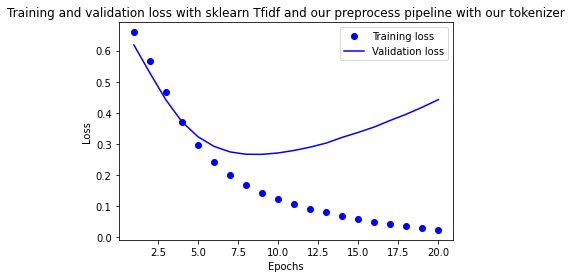

In [51]:

_ = graph_1(history, 'Training and validation loss with sklearn Tfidf and our preprocess pipeline with our tokenizer')

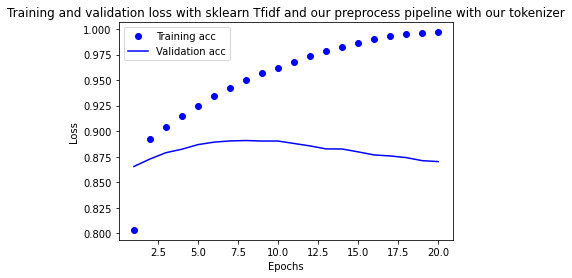

In [52]:
_ = graph_2(history, history_dict, 'Training and validation loss with sklearn Tfidf and our preprocess pipeline with our tokenizer')

In [53]:
# Let sklearn do the tokenization for us
trn_texts = text_preprocessed_untokenized[:25000]
tst_texts = text_preprocessed_untokenized[25000:]

print(trn_texts[:2])
print(tst_texts[:2])

Tfidf_vectorizer_2 = TfidfVectorizer(max_features=10000)

Tfidf_vectorizer_2.fit(text_preprocessed_untokenized)

x_train = Tfidf_vectorizer_2.transform(trn_texts).toarray()
x_test  =  Tfidf_vectorizer_2.transform(tst_texts).toarray()


y_train = np.asarray(trn_labels).astype('float32')
y_test  = np.asarray(tst_labels).astype('float32')


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

print(x_train.shape)
print(Tfidf_vectorizer.vocabulary_)

['self proclaimed talented artist directed easily worst spanish film 21st century lack emotion coherence rhythm skill humor repeat situation show character development even show violent andor sexual content add anything new psychokiller sub genre lame shown film school example first movie btw hell talent scene shot almost identically scene two master shot quite awful see action jumping one master shot another without reason camera almost never move talented artist afraid showing lack visual skill actor playing main role act like amateur supporting cast hardly believable hole plot script ever one really disheartening movie whatsoever talented director', 'movie open meteor crashing lake unbeknownst local dinosaur egg also bottom lake meteor heat lake turning giant incubator guessed egg hatch releasing dinosaur proceeds terrorize community utter garbage mind stopmotion clay dinosaur everything else movie bother acting atrocious dialogue utterly ridiculous comic relief anything comic logic

In [54]:
history = keras_model(x_train, y_train, x_val, y_val, 20, 512, .001)
history_dict = history.history
history_dict.keys()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.6550 - binary_accuracy: 0.8036 - val_loss: 0.6086 - val_binary_accuracy: 0.8598
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5544 - binary_accuracy: 0.8873 - val_loss: 0.5141 - val_binary_accuracy: 0.8704
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4493 - binary_accuracy: 0.9007 - val_loss: 0.4274 - val_binary_accuracy: 0.8757
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3563 - binary_accuracy: 0.9149 - val_loss: 0.3587 - val_binary_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2825 - binary_accuracy: 0.9237 - val_loss: 0.3128 - val_binary_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2286 - binary_accuracy: 0.9337 - val_loss: 0.2859 - val_binary_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

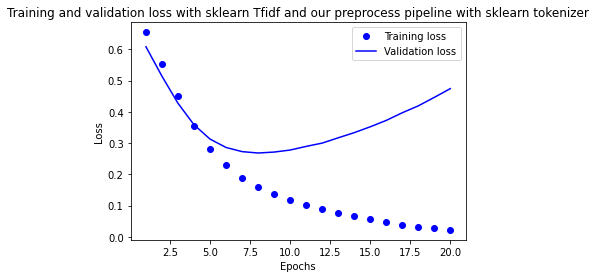

In [55]:

_ = graph_1(history, 'Training and validation loss with sklearn Tfidf and our preprocess pipeline with sklearn tokenizer')

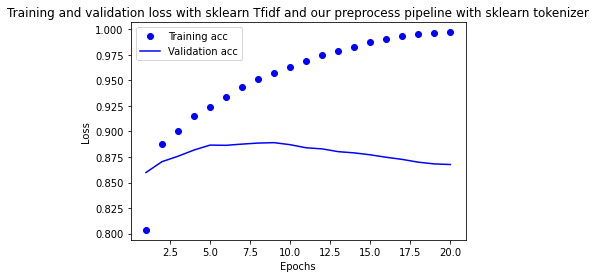

In [56]:
_ = graph_2(history, history_dict, 'Training and validation loss with sklearn Tfidf and our preprocess pipeline with sklearn tokenizer')

In [57]:
#  Let leave the text preprocessing and try again

trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')
text = trn_texts + tst_texts

print(trn_texts[:2])
print(tst_texts[:2])

Tfidf_vectorizer_3 = TfidfVectorizer(max_features=10000)

Tfidf_vectorizer_3.fit(text)

x_train = Tfidf_vectorizer_3.transform(trn_texts).toarray()
x_test  =  Tfidf_vectorizer_3.transform(tst_texts).toarray()


y_train = np.asarray(trn_labels).astype('float32')
y_test  = np.asarray(tst_labels).astype('float32')


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

print(x_train.shape)
print(Tfidf_vectorizer.vocabulary_)

['This self proclaimed "very talented artist" have directed easily the worst Spanish film of the 21st century. Lack of emotion, coherence, rhythm, skills, humor... it repeats the same situation over and over again. It shows no character development. It does not even show any violent and/or sexual content, and it does not add anything new to the psycho-killer sub genre. So lame it should be shown at film schools as an example of "what not to do" in a first movie.<br /><br />BTW where the hell is the "talent"? there are scenes which have been shot almost identically; there are scenes which have two or more master shots and it is quite awful to see the action jumping from one master shot to another without a reason. The camera almost never moves, as if the "very talented artist" was afraid of showing his lack of visual skills. The actors playing the main roles act like amateurs, and the supporting cast is hardly believable. There are more holes than plot in the script (if ever there was o

In [58]:
history = keras_model(x_train, y_train, x_val, y_val, 20, 512, .001)
history_dict = history.history
history_dict.keys()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.6646 - binary_accuracy: 0.7268 - val_loss: 0.6255 - val_binary_accuracy: 0.8534
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5784 - binary_accuracy: 0.8713 - val_loss: 0.5381 - val_binary_accuracy: 0.8667
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4791 - binary_accuracy: 0.8914 - val_loss: 0.4506 - val_binary_accuracy: 0.8721
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3864 - binary_accuracy: 0.9057 - val_loss: 0.3806 - val_binary_accuracy: 0.8791
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3119 - binary_accuracy: 0.9149 - val_loss: 0.3274 - val_binary_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2551 - binary_accuracy: 0.9269 - val_loss: 0.2945 - val_binary_accuracy: 0.8898
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

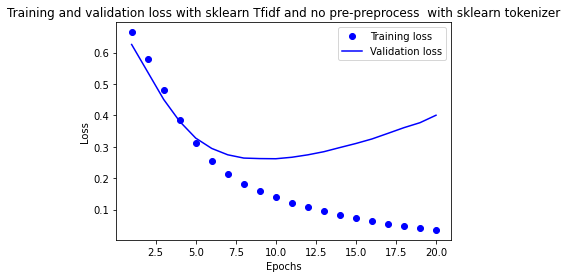

In [59]:

_ = graph_1(history, 'Training and validation loss with sklearn Tfidf and no pre-preprocess  with sklearn tokenizer')

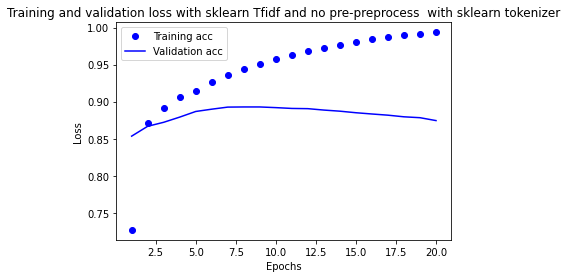

In [60]:
_ = graph_2(history, history_dict, 'Training and validation loss with sklearn Tfidf and no pre-preprocess  with sklearn tokenizer')

# Notes !

All of these multiple experiments have little effect on the end result,  but all of these pipelines missed the
 context of words, which important to the last result of positive or negative review as language is consider as state of words each of them are state for next word to the end of the sentence, also we limit the number of words to 10k which include a sparce vector for each document as small poration of words comes in each document, but the model need a fixed length at the end, and this sparce vector about document does not hold any infromation about the meaning of the words or sequence it comes in it just consider most 10k common words in our data and what about rare words ? its not included in your vocubalary which maybe the most important words to your document.


 # Next is the Embedding ^^